In [1]:
# List of imports

import networkx as nx
import numpy as np
import pickle
from pathlib import Path
import os
import torch
import time
import dgl

import WLColorRefinement.WLColorRefinement as wl
from data.molecules import MoleculeDataset
import WLColorRefinement.create_reduced_graph as crg

Using backend: pytorch


In [2]:
"""
    Funtion to draw the graph\n",
"""
def drawGraph(G):
    nx_G = G.to_networkx().to_undirected()
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos, with_labels=True, node_color=G.ndata['feat'])

In [3]:
ZINC_original = MoleculeDataset('ZINC')

[I] Loading dataset ZINC...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 7.9134s


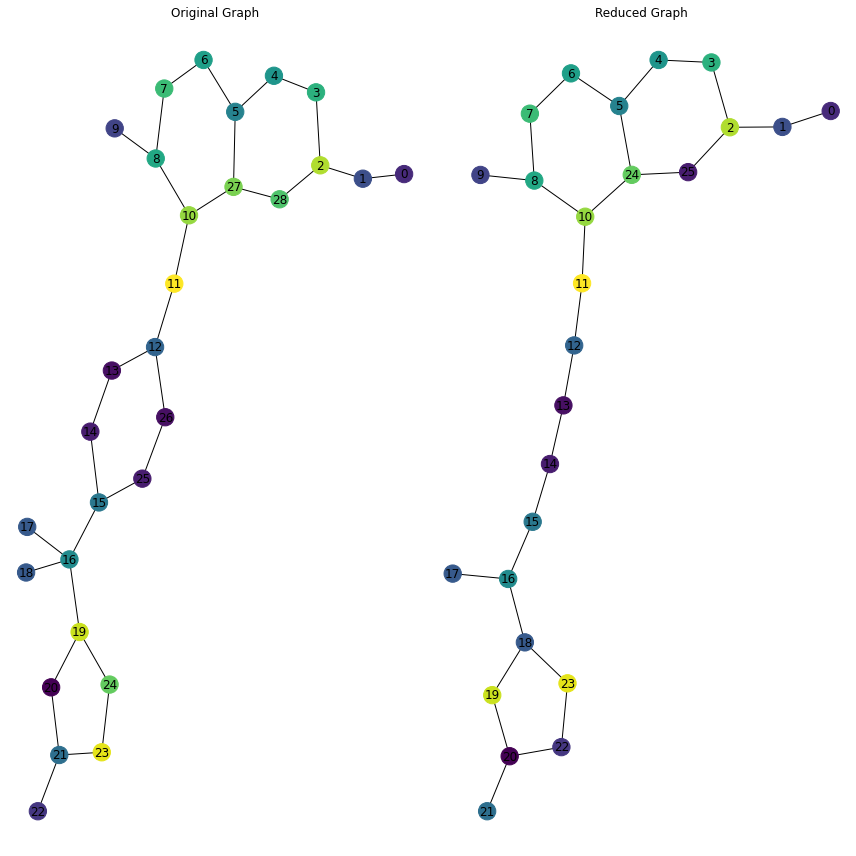

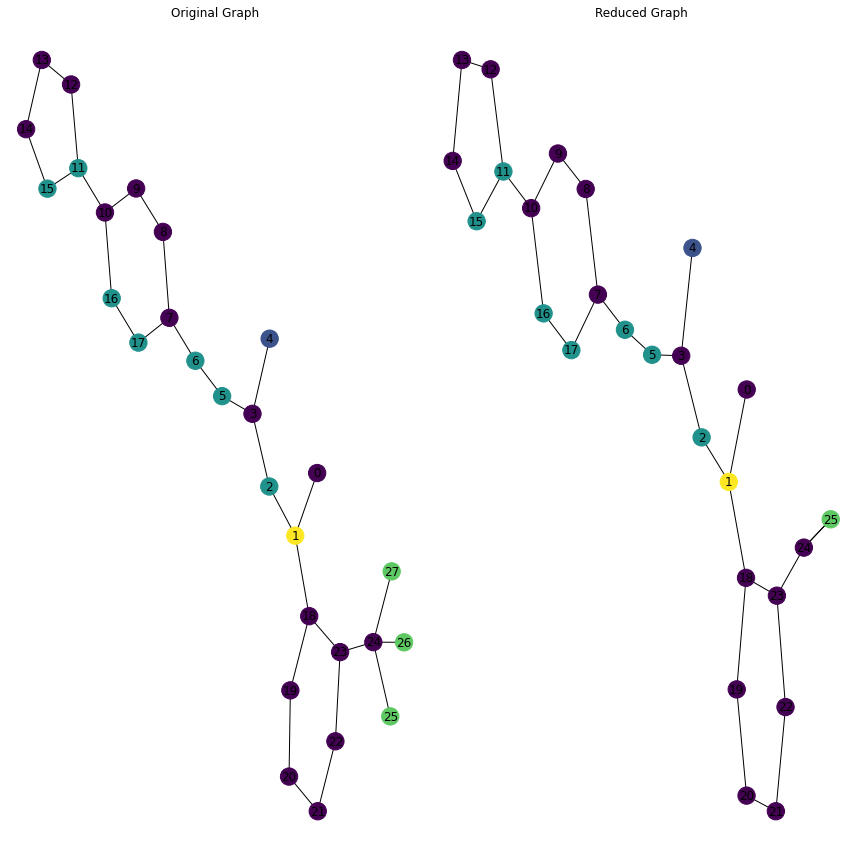

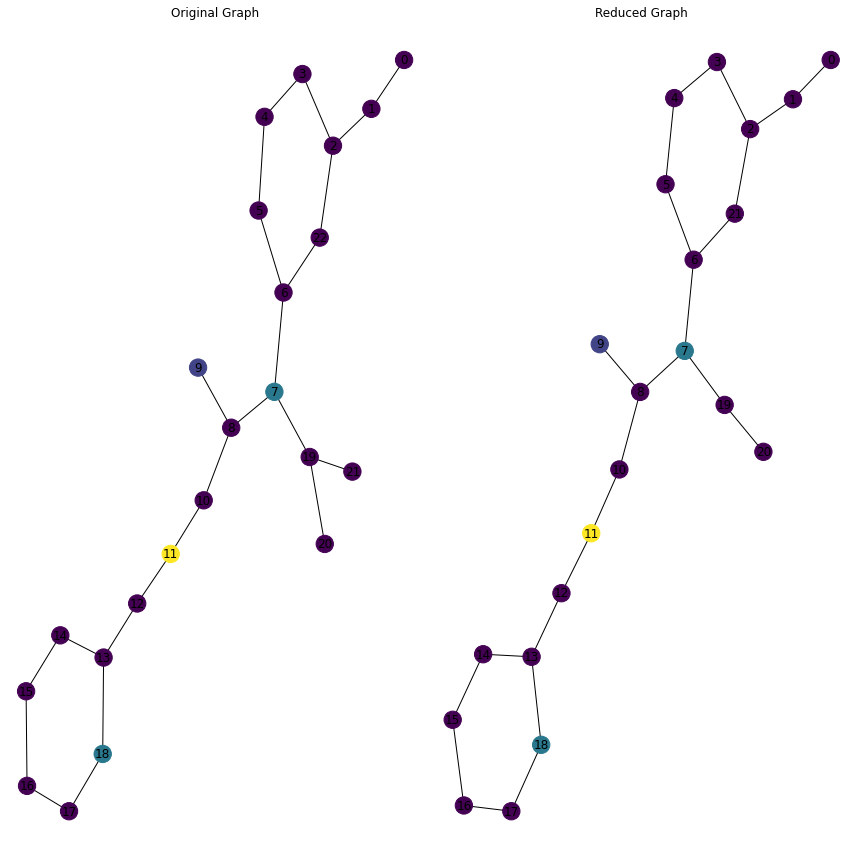

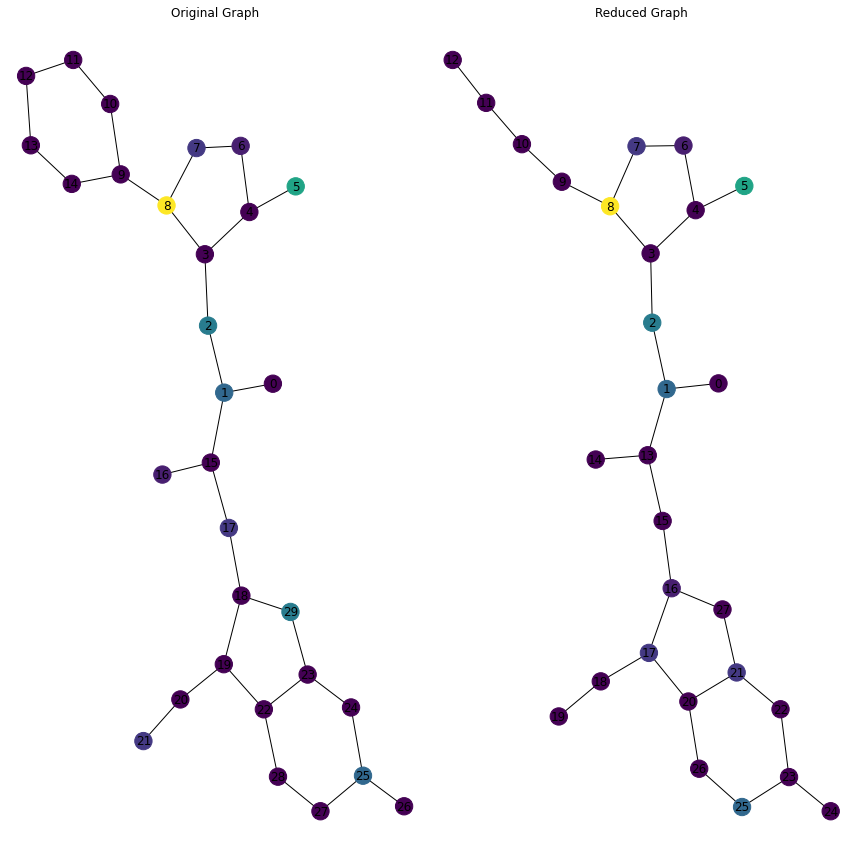

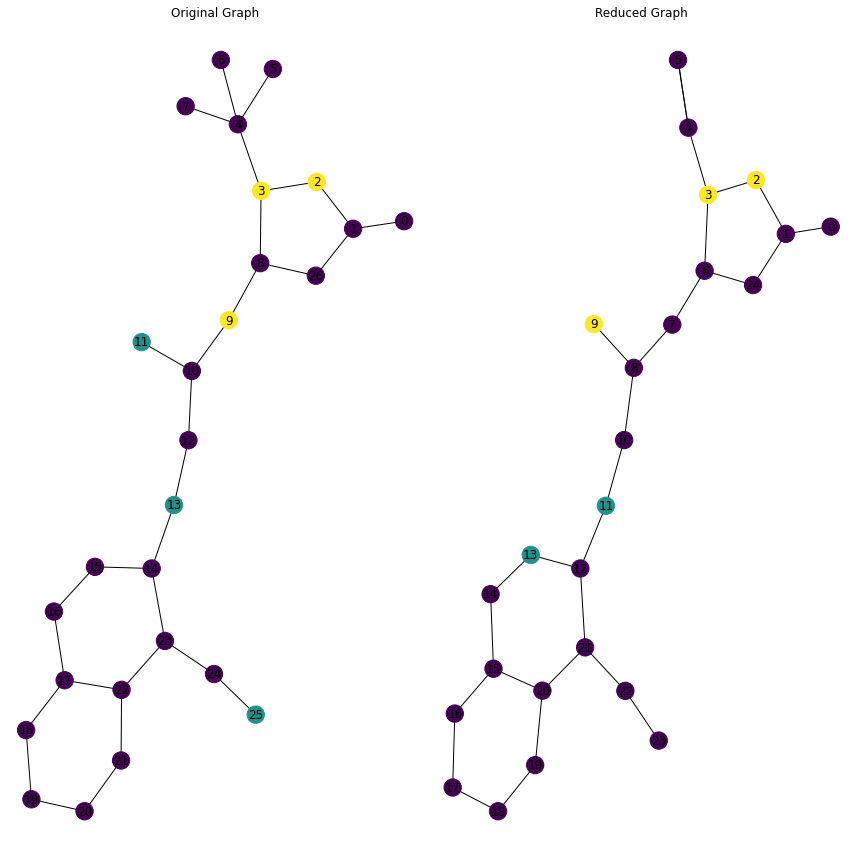

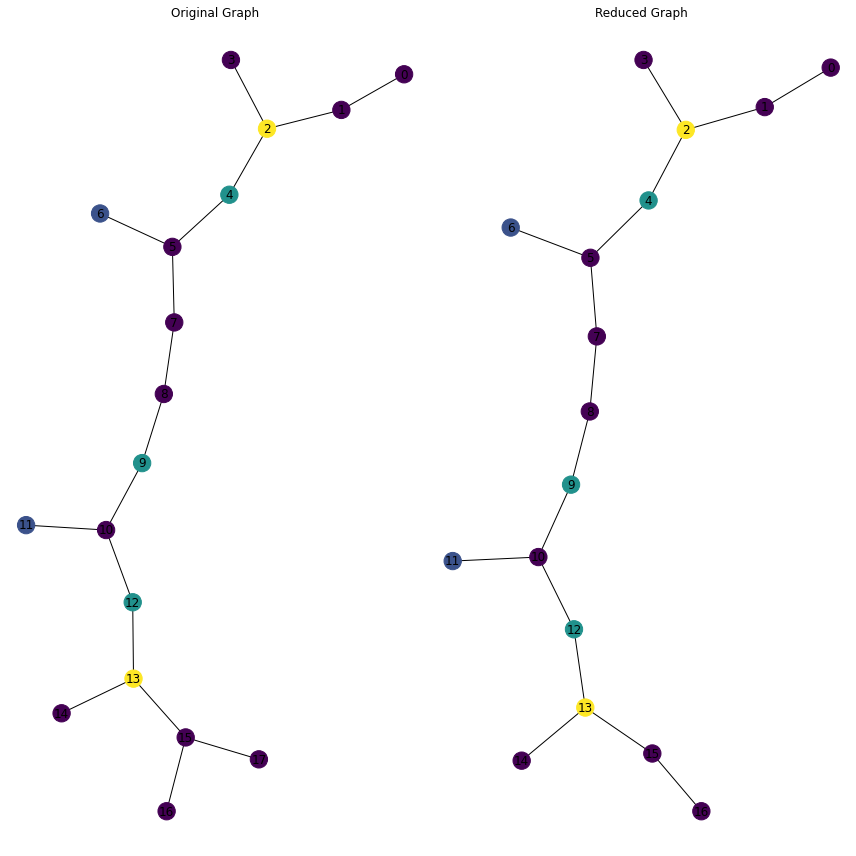

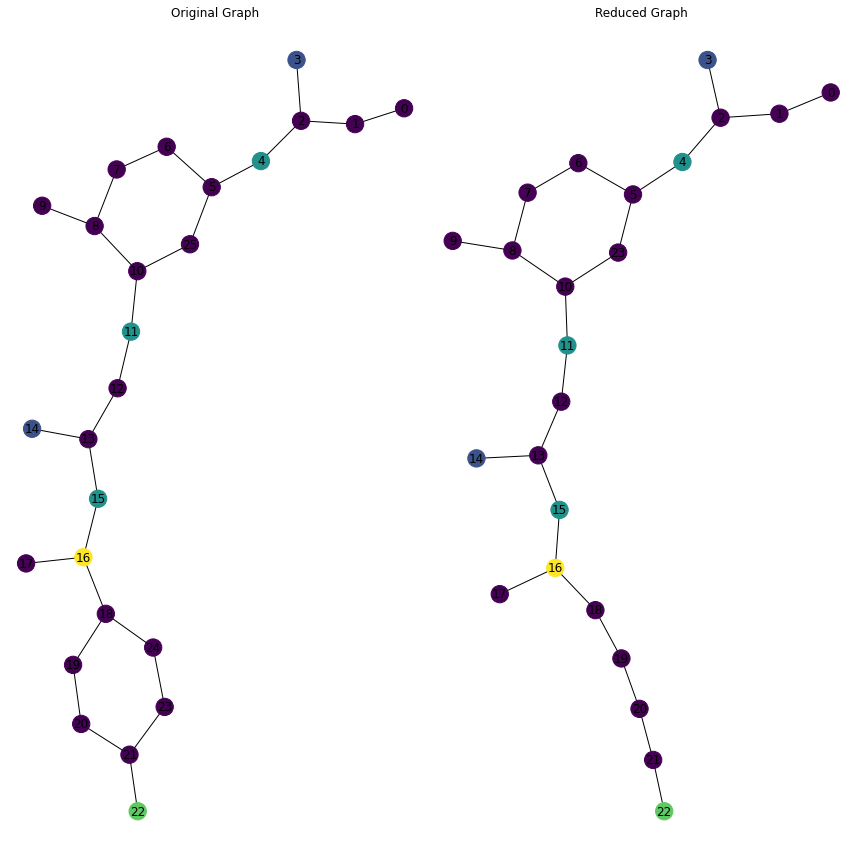

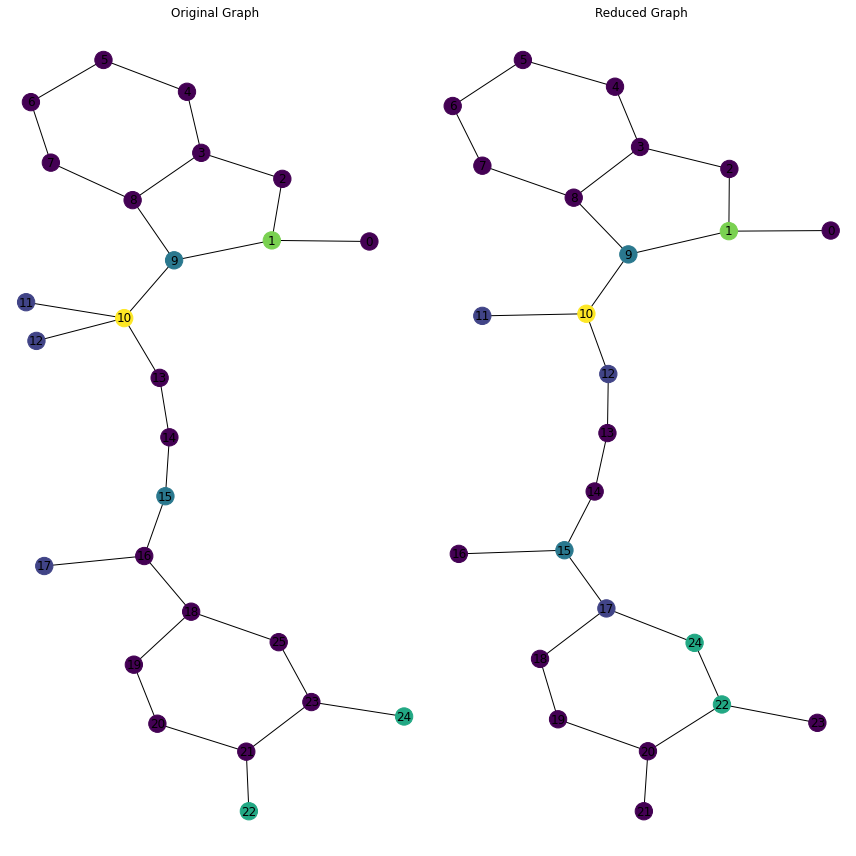

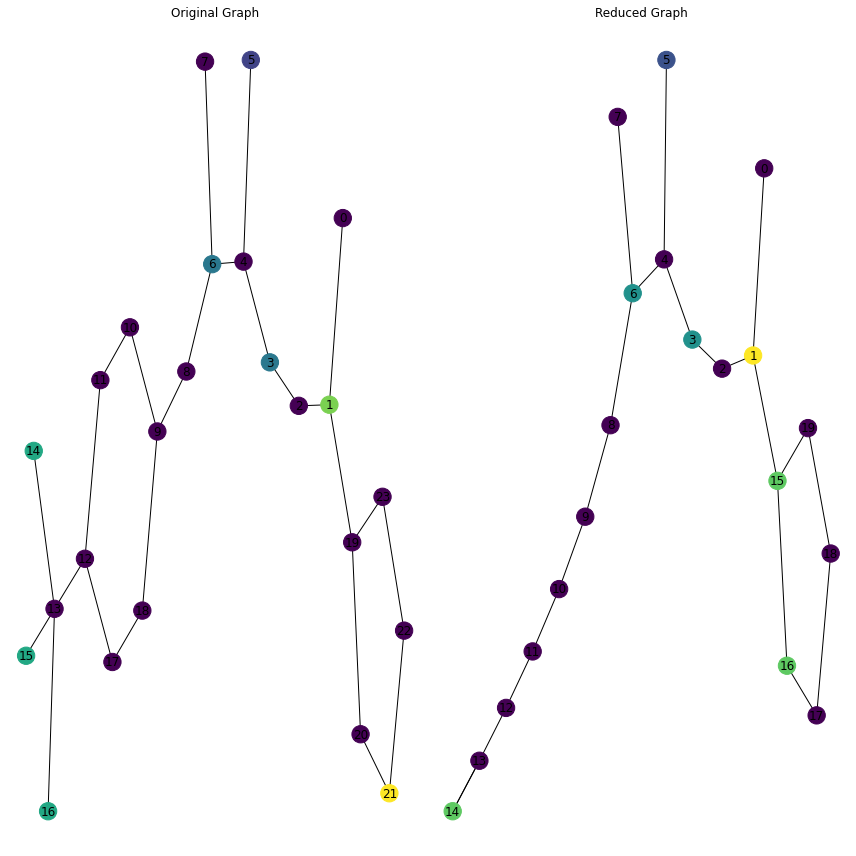

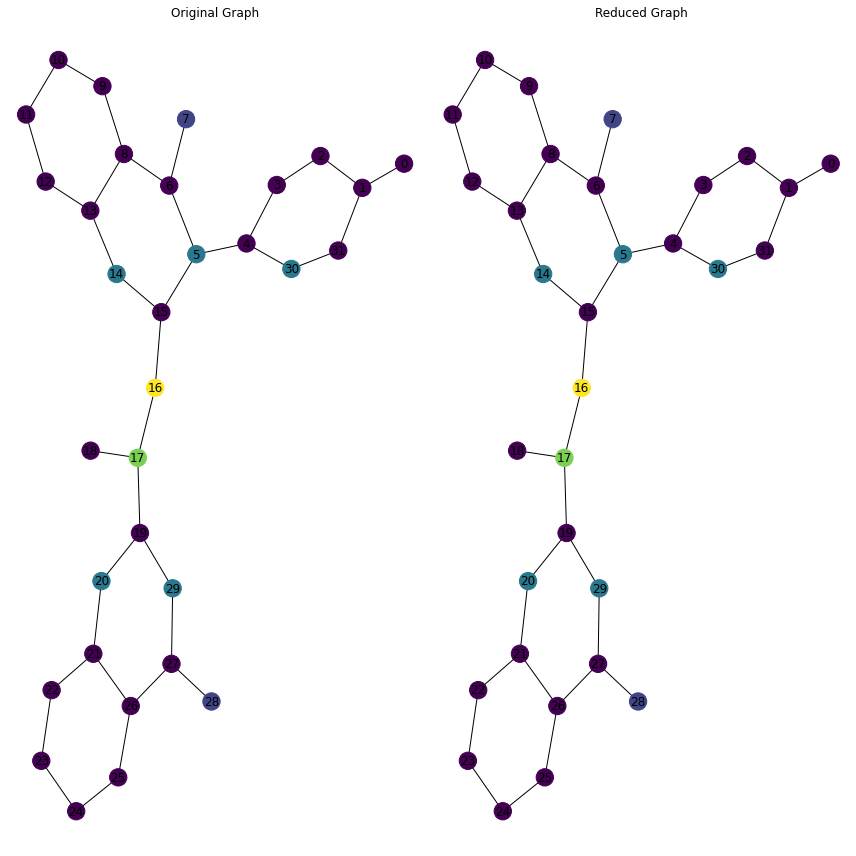

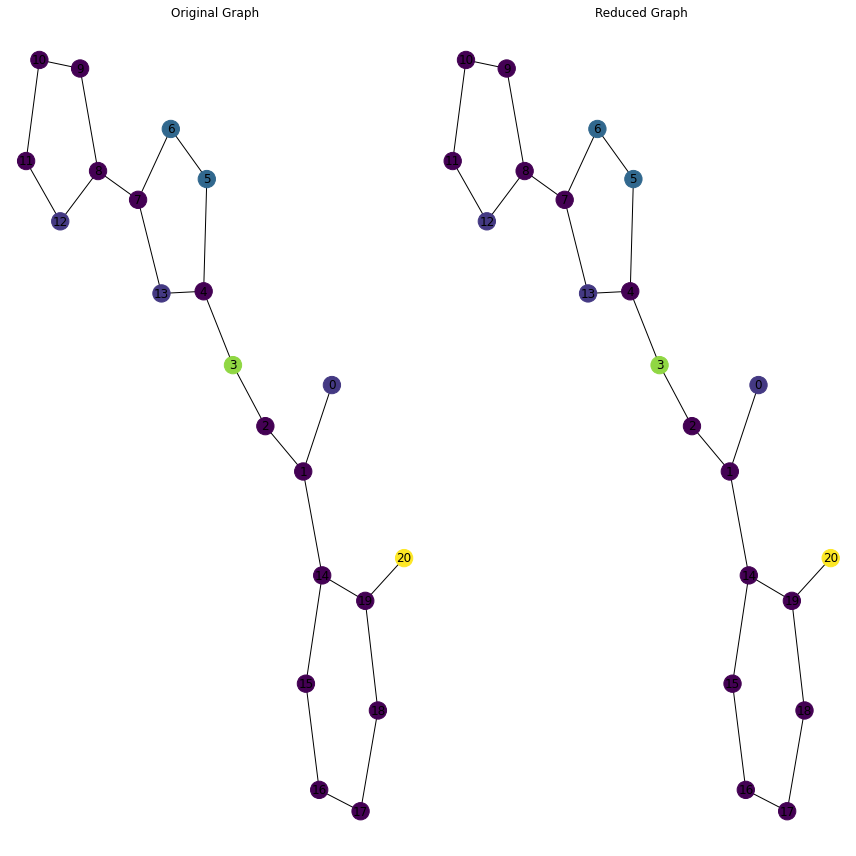

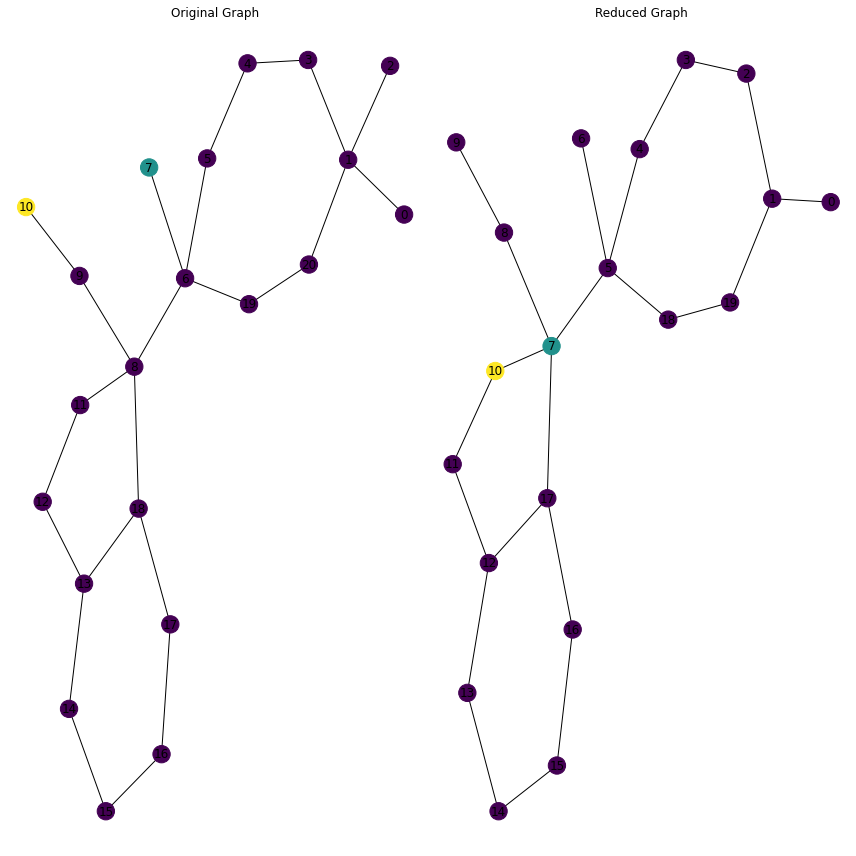

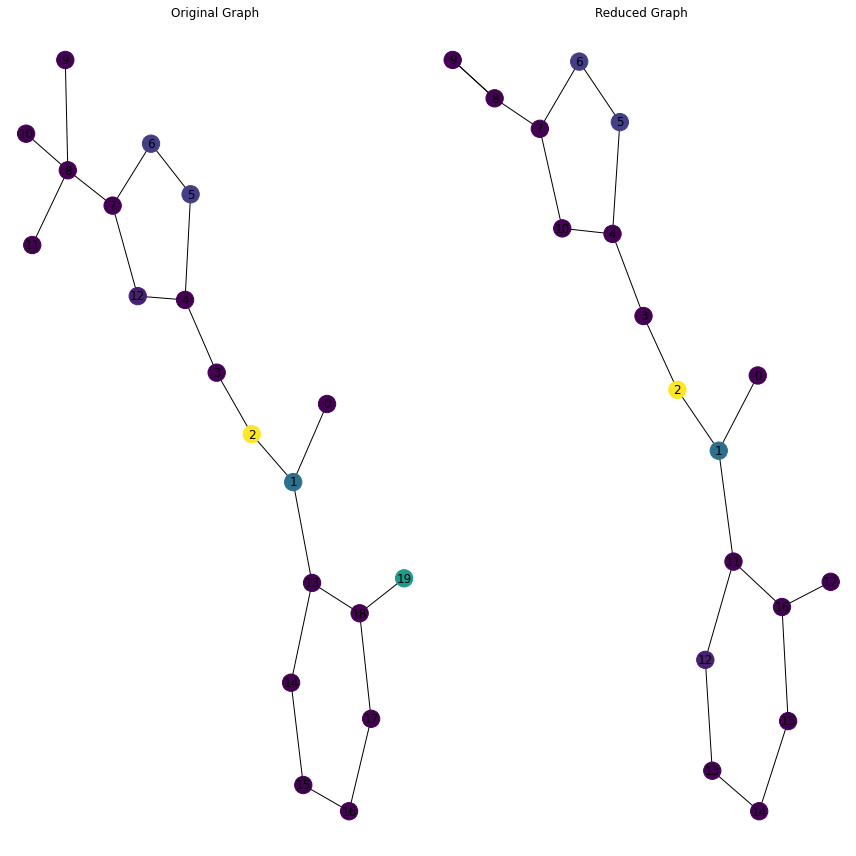

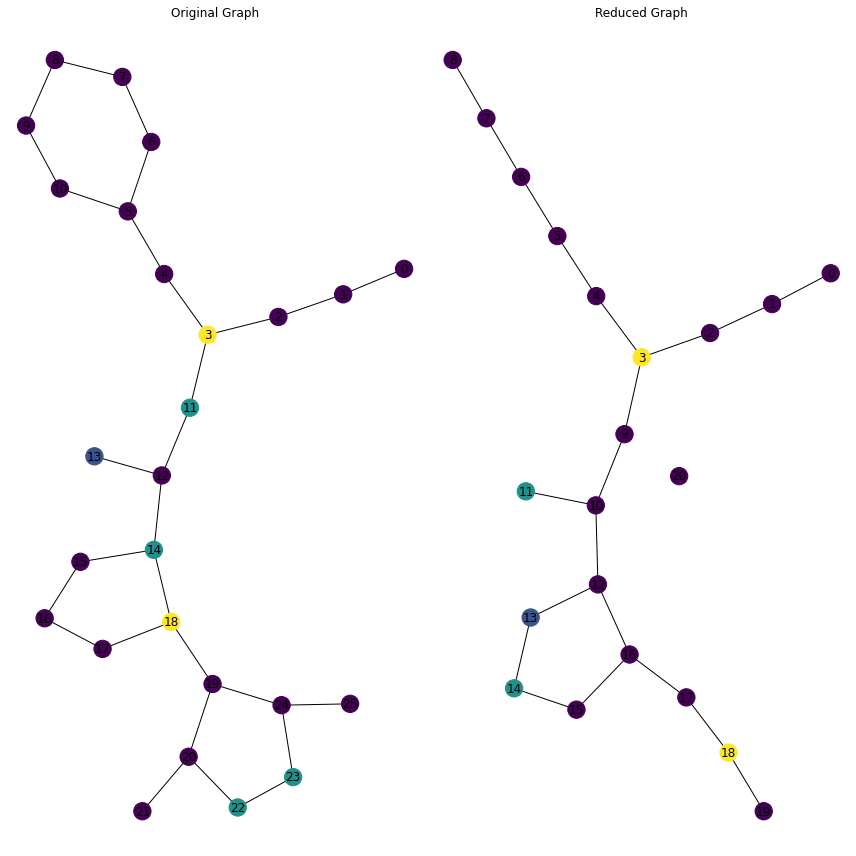

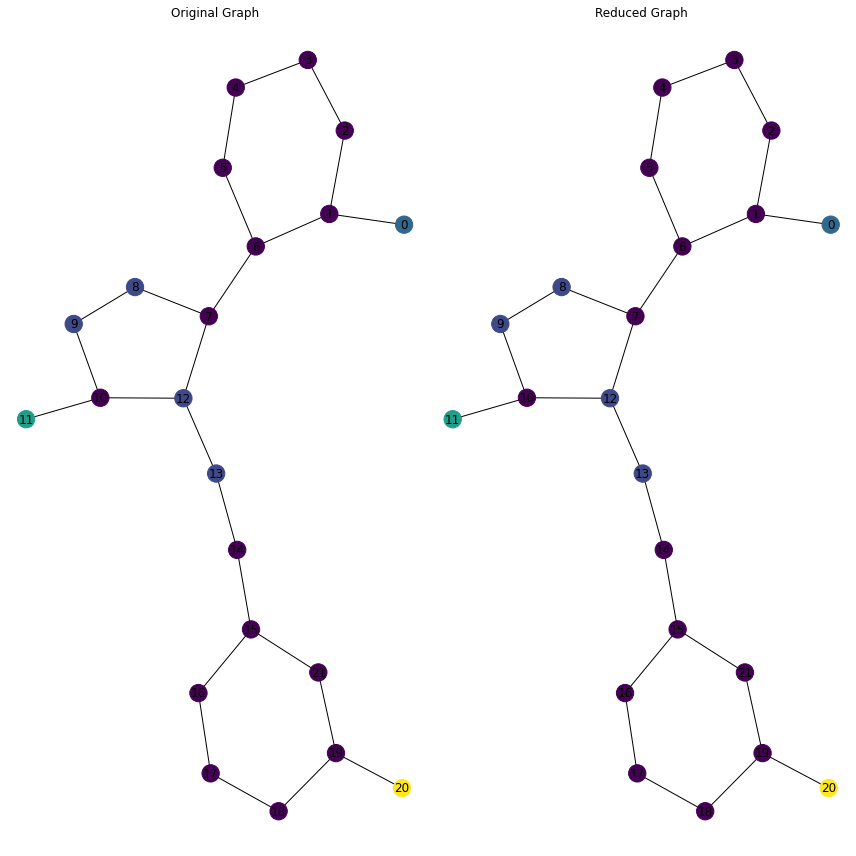

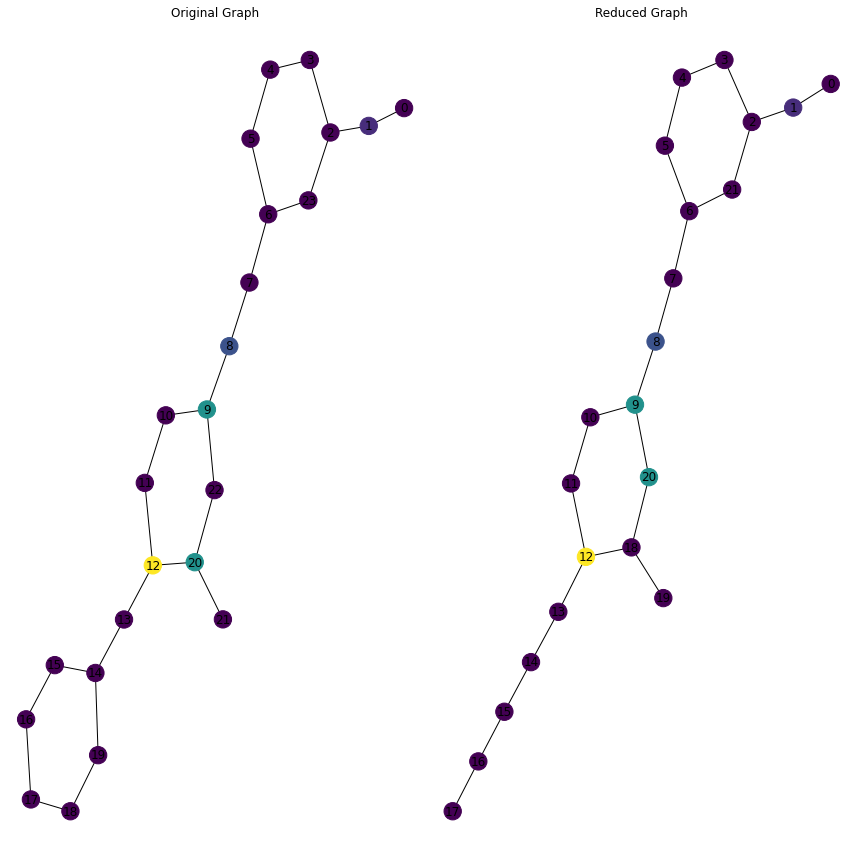

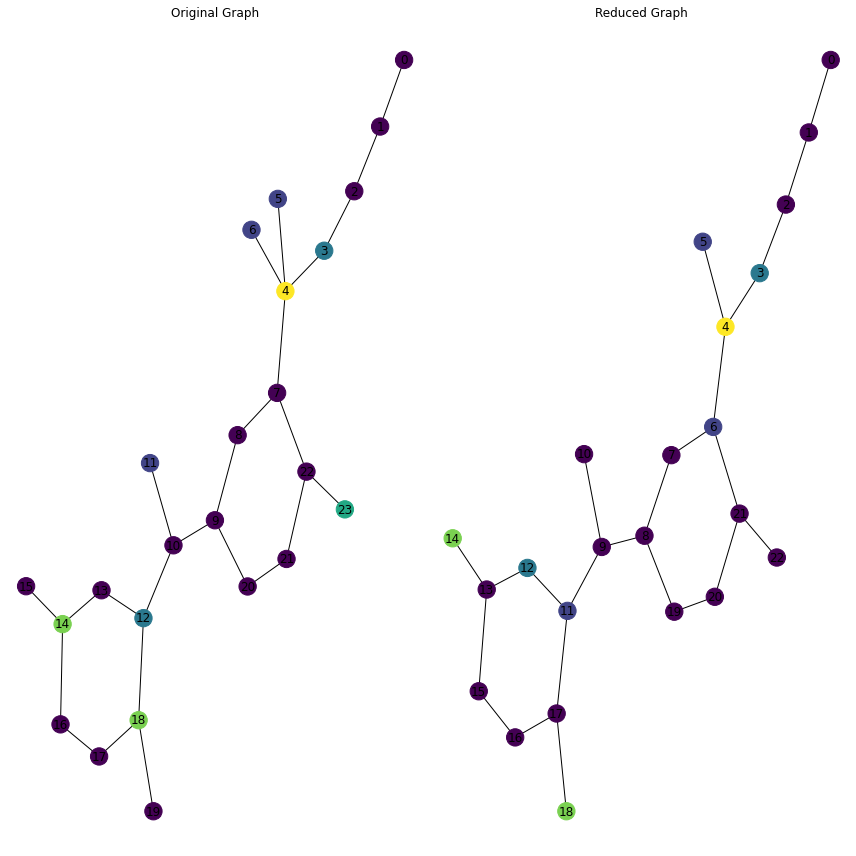

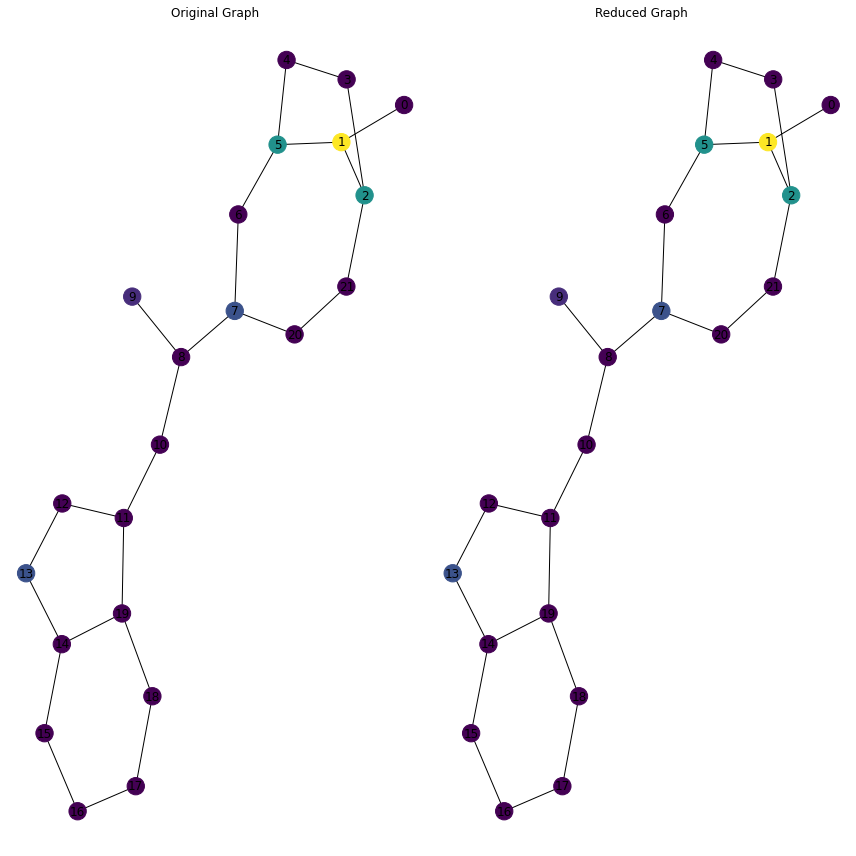

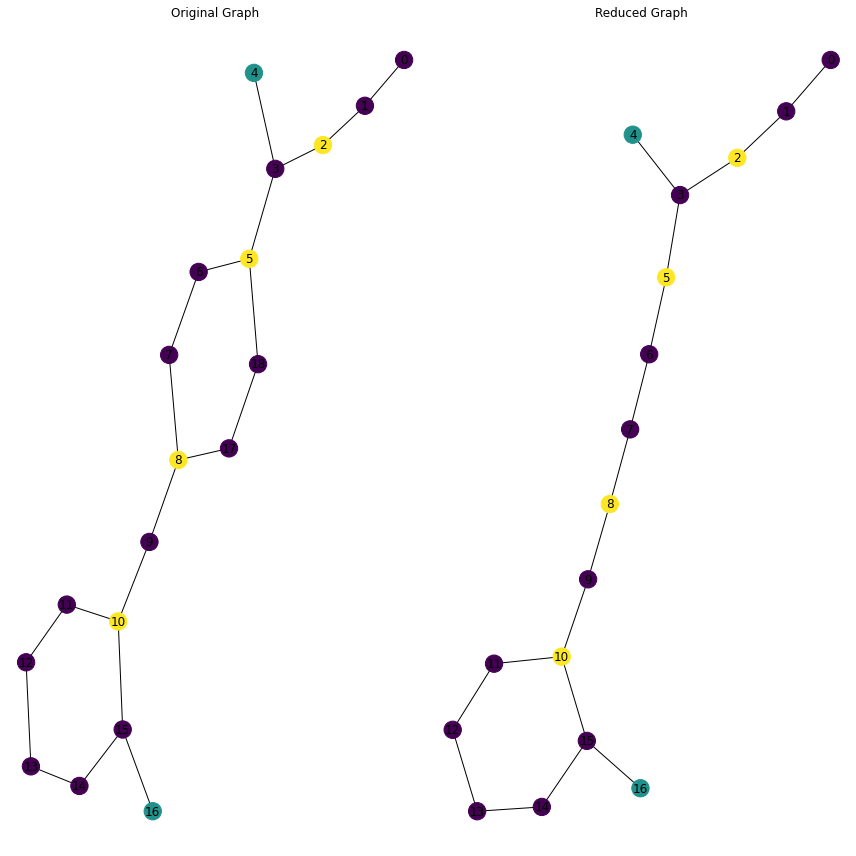

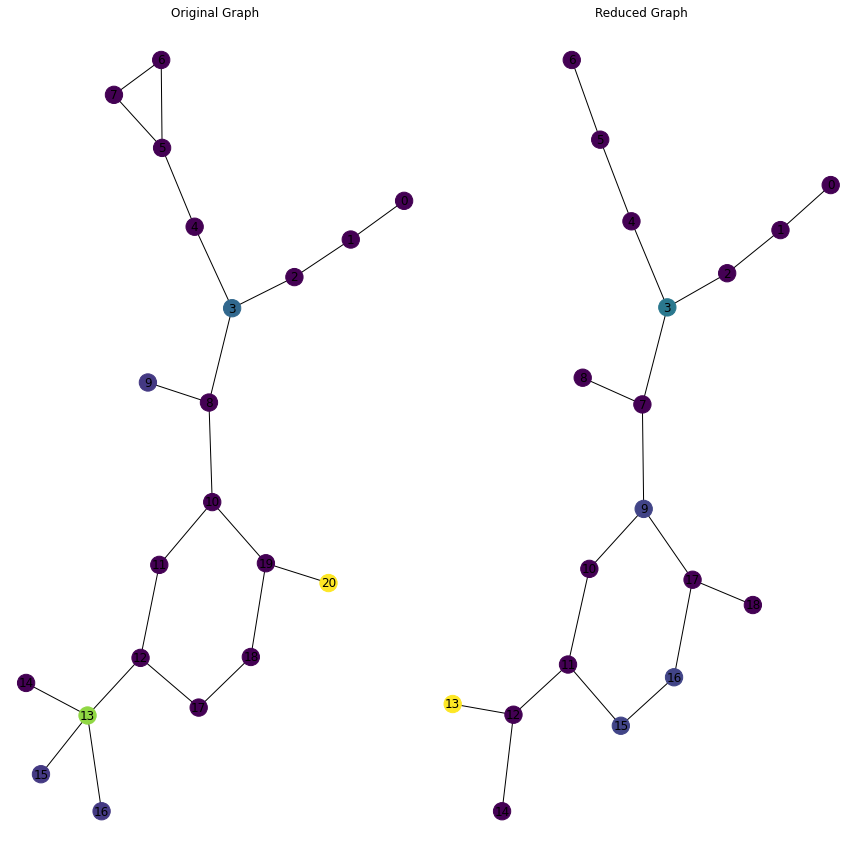

In [7]:
import matplotlib.pyplot as plt

for i in range(0, 100, 5):
    fig1 = plt.figure(figsize=(12,12))
    plt.subplot(1, 2, 1)
    plt.title("Original Graph")

    G = ZINC_original.train[i][0]
    G.ndata['original_feat'] = G.ndata['feat']
    nx_G = G.to_networkx().to_undirected()
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos, with_labels=True, node_color=G.ndata['feat'])

    # plt.tight_layout()
    # plt.savefig("Graph.png", format="PNG")
    # plt.show()

    plt.subplot(1, 2, 2)
    plt.title("Reduced Graph")

    F = crg.reduced_graph(wl.wl_coloring(G))
    nx_F = F.to_networkx().to_undirected()
    pos = nx.kamada_kawai_layout(nx_F)

    nx.draw(nx_F, pos, with_labels=True, node_color=F.ndata['feat'][: ,0])

    plt.tight_layout()
    plt.savefig("Graph"+str(i)+".png", format="PNG")
    plt.show()
